# Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [2]:
df=pd.read_csv("C:/Users/Anuj/Downloads/Fraud_Analysis_Dataset.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [4]:
df.shape

(11142, 10)

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


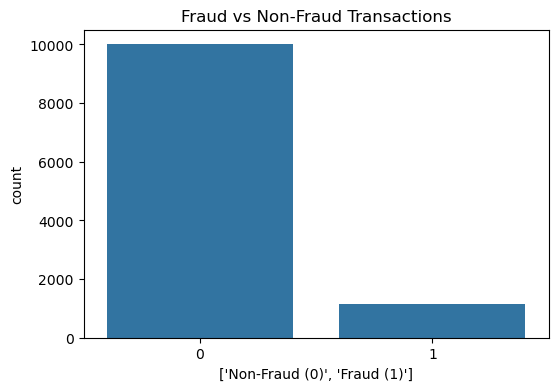

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['isFraud'])
plt.xlabel(["Non-Fraud (0)","Fraud (1)"])
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

In [9]:
df['isFraud'].value_counts(normalize=True) * 100

isFraud
0    89.750494
1    10.249506
Name: proportion, dtype: float64

1. The chart shows a heavy class imbalance with far fewer fraud cases.
2. Only 10.25% of transactions are fraudulent, while 89.75% are non-fraudulent.
3. This class imbalance can impact model performance, making it biased toward non-fraud cases.
4. Fraud detection models must handle this imbalance carefully.


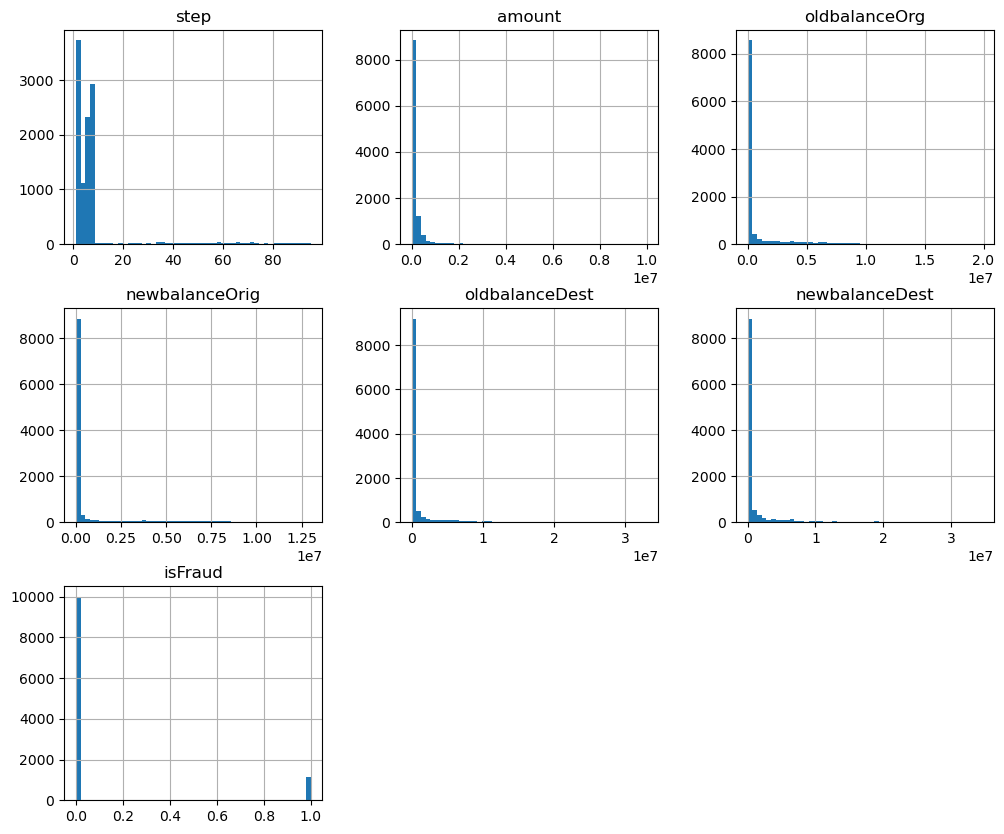

In [10]:
df.hist(figsize=(12,10), bins=50)
plt.show()

1. Most features have right-skewed distributions, meaning a few transactions involve very large amounts.

2. The isFraud distribution confirms the dataset's fraud imbalance.


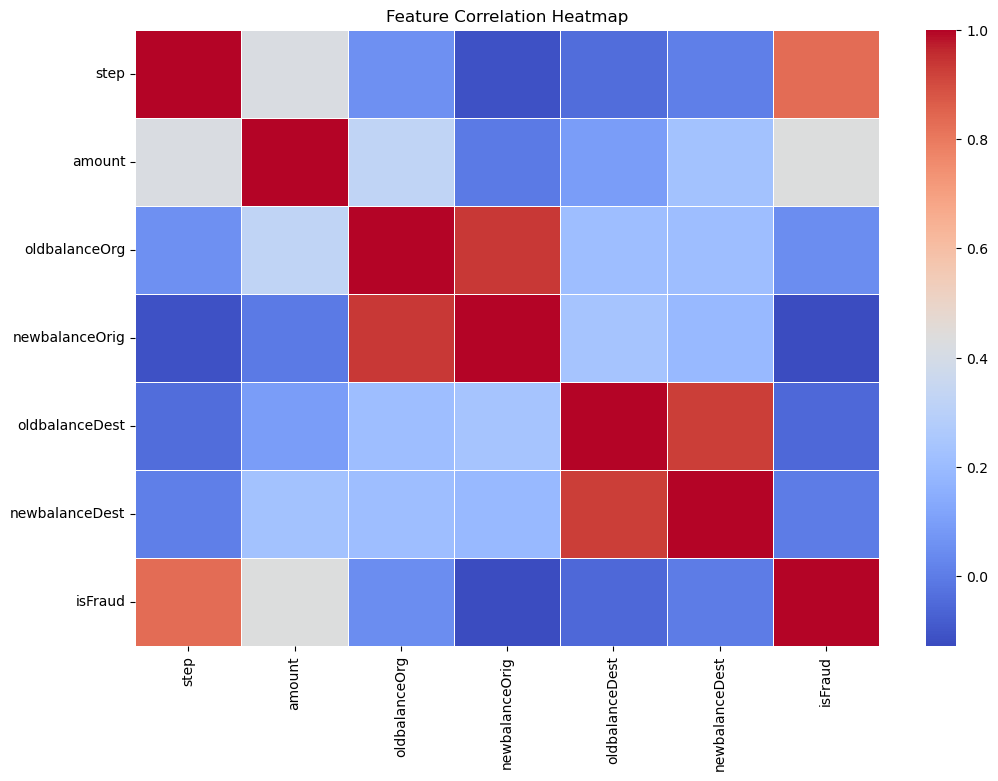

In [11]:
plt.figure(figsize=(12,8))

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# plot the heatmap
sns.heatmap(df_numeric.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

1. Strong correlation between oldbalanceOrg and newbalanceOrg, as well as oldbalanceDest and newbalanceDest, indicates balance consistency.
2. Transaction amount doesn't strongly affect fraud, meaning fraud can happen with any amount.
3. High correlations suggest feature redundancy, and some features might be removed to improve model efficiency.

C:\Users\Anuj\AppData\Local\Temp\ipykernel_27508\3840833291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rates.index, y=fraud_rates.values, palette='rocket')


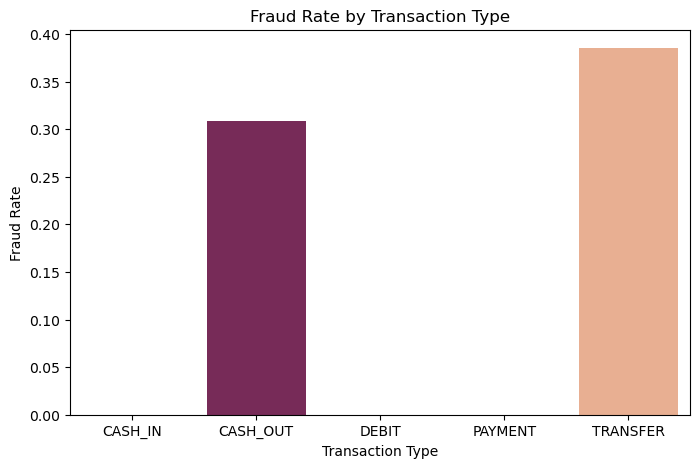

In [12]:
#barplot
plt.figure(figsize=(8, 5))
fraud_rates = df.groupby('type')['isFraud'].mean()
sns.barplot(x=fraud_rates.index, y=fraud_rates.values, palette='rocket')
plt.title('Fraud Rate by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.show()



1. Fraud is most common in TRANSFER and CASH_OUT transactions.
2. This suggests fraudsters mainly use these two transaction types to move money illegally.


C:\Users\Anuj\AppData\Local\Temp\ipykernel_27508\1762285883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['isFraud'], y=df['amount'], palette='Set2')


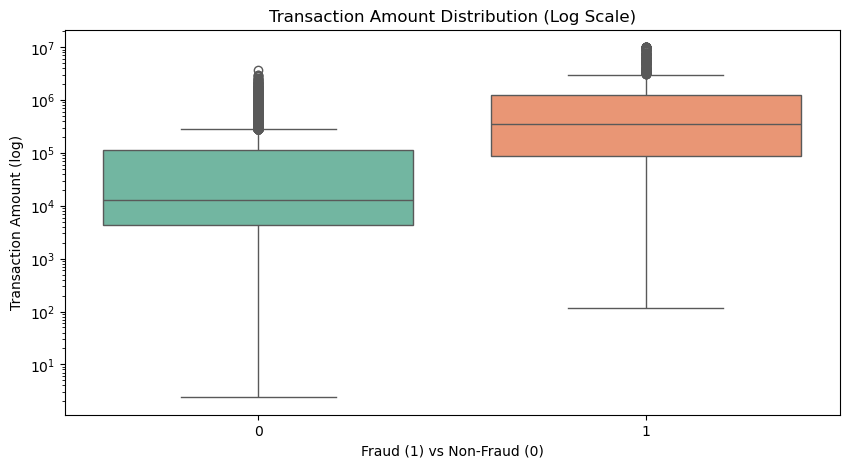

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['isFraud'], y=df['amount'], palette='Set2')
plt.yscale("log")  # Log scale for better visibility
plt.title('Transaction Amount Distribution (Log Scale)')
plt.xlabel('Fraud (1) vs Non-Fraud (0)')
plt.ylabel('Transaction Amount (log)')
plt.show()

1. The log scale shows fraud transactions are more concentrated in larger values.
2. This suggests fraudsters prefer high-value transactions to maximize their gains.


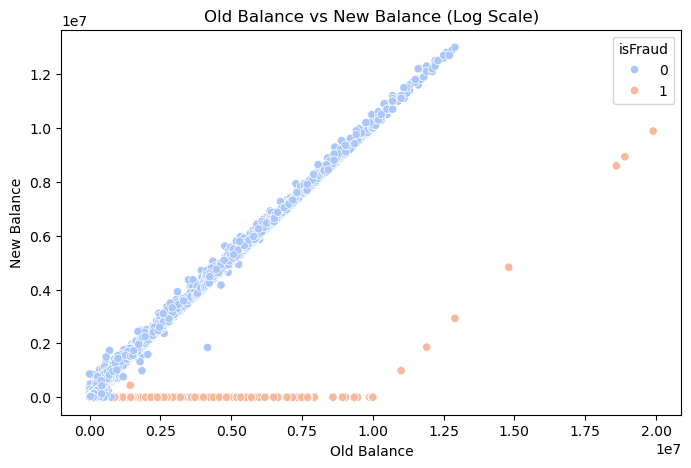

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['oldbalanceOrg'], y=df['newbalanceOrig'], hue=df['isFraud'], palette='coolwarm')
plt.title('Old Balance vs New Balance (Log Scale)')
plt.xlabel('Old Balance')
plt.ylabel('New Balance')
plt.show()


1. fraudulent transactions (orange) often result in a zero new balance, meaning the sender's account is emptied.
2. Non-fraudulent transactions (blue) follow a more linear pattern, maintaining a logical balance transition.
3. This suggests fraudsters drain accounts completely, making balance changes a key fraud indicator.


# Feature engineering 

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [16]:
#Encode Transaction Type (Convert categorical 'type' into numerical values)
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

In [17]:
df.head

<bound method NDFrame.head of        step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0         1  TRANSFER     181.00  C1305486145         181.00            0.00   
1         1  CASH_OUT     181.00   C840083671         181.00            0.00   
2         1  TRANSFER    2806.00  C1420196421        2806.00            0.00   
3         1  CASH_OUT    2806.00  C2101527076        2806.00            0.00   
4         1  TRANSFER   20128.00   C137533655       20128.00            0.00   
...     ...       ...        ...          ...            ...             ...   
11137     7     DEBIT    6393.71  C1331144930      433084.38       426690.68   
11138     7  CASH_OUT  298799.54   C932023579      426690.68       127891.14   
11139     7  CASH_OUT  423159.63    C61395726      127891.14            0.00   
11140     7   PAYMENT    1094.03  C1224570697       13918.00        12823.97   
11141     7   PAYMENT    9235.58  C1637966097       39963.00        30727.42   

         

In [18]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'type_encoded'],
      dtype='object')

In [19]:
# Compute the difference between old and new balance to capture transaction impact
df['balance_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']

In [27]:
# Flag transactions where the account was completely drained
df['isDrained'] = (df['newbalanceOrig'] == 0).astype(int)

In [30]:
scaler = StandardScaler()
df['amount_scaled'] = scaler.fit_transform(df[['amount']])


In [31]:
# 4. Drop Unnecessary Columns (Remove non-informative or categorical identifiers)
drop_cols = ['type', 'nameOrig', 'nameDest']  # Removing textual and non-essential identifiers
df.drop(columns=drop_cols, inplace=True)


In [32]:
# Display first few rows of the updated dataset
print("Processed Dataset Preview:")
print(df.head())

Processed Dataset Preview:
   step   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1    181.0          181.0             0.0             0.0   
1     1    181.0          181.0             0.0         21182.0   
2     1   2806.0         2806.0             0.0             0.0   
3     1   2806.0         2806.0             0.0         26202.0   
4     1  20128.0        20128.0             0.0             0.0   

   newbalanceDest  isFraud  type_encoded  balance_change  isDrained  \
0             0.0        1             4           181.0          1   
1             0.0        1             1           181.0          1   
2             0.0        1             4          2806.0          1   
3             0.0        1             1          2806.0          1   
4             0.0        1             4         20128.0          1   

   amount_scaled  
0      -0.280266  
1      -0.280266  
2      -0.276812  
3      -0.276812  
4      -0.254021  


1. type_encoded: Converts transaction types into numbers for the model.
2. balance_change: Captures how much money was moved.
3. isDrained: Flags if the sender’s account was emptied.
4. amount_scaled: Normalizes transaction amounts for better model performance.

# Model Selection

In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [34]:
# 5. Handle Data Imbalance with SMOTE
X = df.drop(columns=['isFraud'])
y = df['isFraud']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [36]:
# 6. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [38]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred)}\n")


C:\Users\Anuj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      2039
           1       0.79      0.98      0.88      1961

    accuracy                           0.86      4000
   macro avg       0.88      0.87      0.86      4000
weighted avg       0.89      0.86      0.86      4000

ROC-AUC Score: 0.8662891564517408

Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2039
           1       1.00      1.00      1.00      1961

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

ROC-AUC Score: 0.9987348939434221

Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2039
           1       1.00      0.99      1.00      1961

    accuracy                           

1. Logistic Regression: Simple but less effective (86.6% ROC-AUC), may misclassify some fraud cases.

2. Forest: Near-perfect (99.87% ROC-AUC), but might overfit.

3. Gradient Boosting: Also high accuracy (99.69% ROC-AUC), great for detecting fraud.



# Performance Evaluation

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
# Initialize models
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

# Train models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)


C:\Users\Anuj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

In [42]:
# Define models and their predictions
models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "Gradient Boosting": gb}


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      2039
           1       0.79      0.98      0.88      1961

    accuracy                           0.86      4000
   macro avg       0.88      0.87      0.86      4000
weighted avg       0.89      0.86      0.86      4000

Logistic Regression ROC-AUC Score: 0.9882



<Figure size 700x500 with 0 Axes>

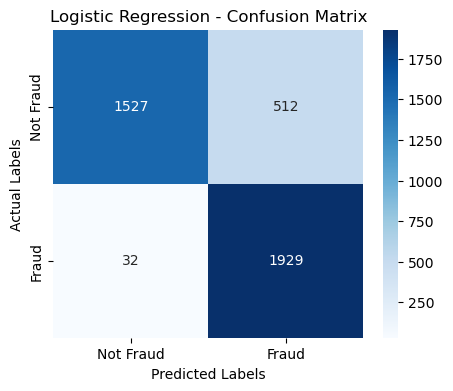


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2039
           1       1.00      1.00      1.00      1961

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Random Forest ROC-AUC Score: 1.0000



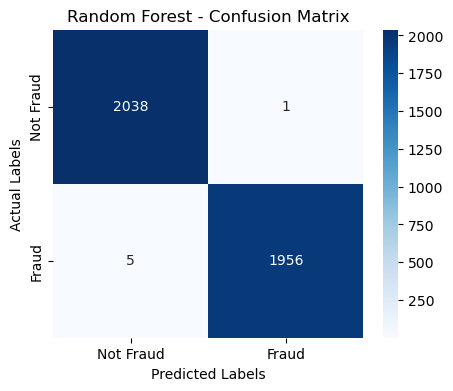


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2039
           1       1.00      0.99      1.00      1961

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Gradient Boosting ROC-AUC Score: 0.9999



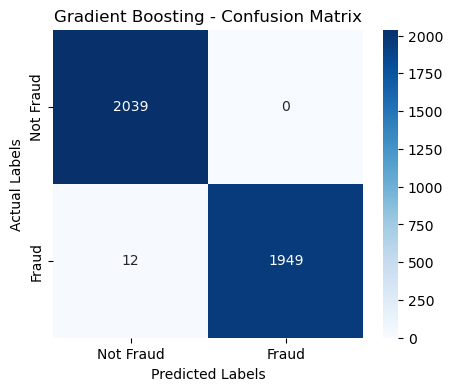

In [70]:
# Store predictions and probabilities outside the loop for later analysis
model_predictions = {}  # Stores predicted labels for each model
model_probabilities = {}  # Stores predicted probabilities for each model

# Initialize the figure for ROC Curve comparison
plt.figure(figsize=(7, 5))

for name, model in models.items():
    # predictions on the test set
    y_pred = model.predict(X_test)  # Binary class predictions (fraud or not fraud)
    y_probs = model.predict_proba(X_test)[:, 1]  # Probability of fraud (positive class)
    
    # Store predictions and probabilities for future evaluation
    model_predictions[name] = y_pred
    model_probabilities[name] = y_probs
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred)) # Print classification report (Precision, Recall, F1-score, etc.)
    
    # Compute and print ROC-AUC Score (Measures model's ability to distinguish fraud vs. non-fraud)
    roc_auc = roc_auc_score(y_test, y_probs)
    print(f"{name} ROC-AUC Score: {roc_auc:.4f}\n")
    
    # Generate and display Confusion Matrix (Shows correct and incorrect predictions)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Fraud', 'Fraud'], 
                yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


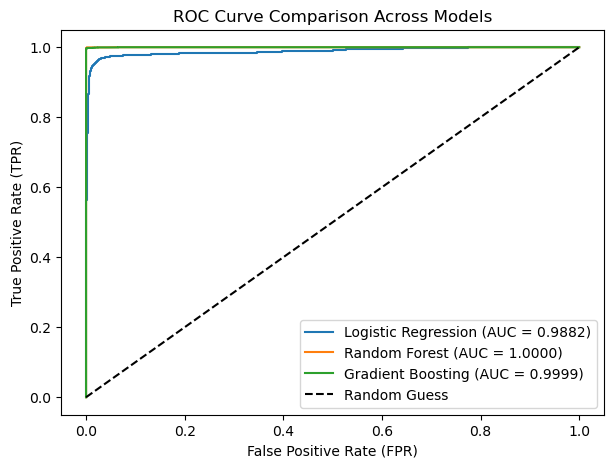

In [45]:
 # Initialize the figure for ROC Curve comparison
plt.figure(figsize=(7, 5))

for name, model in models.items():
    # Compute ROC Curve (True Positive Rate vs False Positive Rate)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_probs):.4f})")

# Plot Final ROC Curve Comparison for all models
plt.plot([0,1], [0,1], 'k--', label='Random Guess')  # Reference diagonal line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison Across Models")
plt.legend()
plt.show()


1. Logistic Regression: Good precision but lower recall for non-fraud cases. Some fraudulent transactions might be missed.

2. Random Forest: Achieves perfect accuracy (100%), meaning it classifies all transactions correctly. However, this might indicate overfitting.

3. Gradient Boosting: Nearly perfect (99.7% accuracy), balancing fraud detection and generalization better than Random Forest.

# Financial Impact Analysis

In [52]:
# Financial Impact Analysis
fraud_cost = 5000  # Estimated loss per fraud case
false_negatives = np.sum((y_test == 1) & (y_pred == 0))  # Missed fraud cases
true_positives = np.sum((y_test == 1) & (y_pred == 1))  # Detected fraud cases

missed_loss = false_negatives * fraud_cost  # Loss due to missed fraud
saved_amount = true_positives * fraud_cost  # Money saved by detecting fraud

print(f"Estimated Loss from Missed Fraud Cases: ${missed_loss}")
print(f"Estimated Savings from Detected Fraud Cases: ${saved_amount}")

# Assume operational cost of running the model
model_cost = 10000  # Example cost of running the model
profit = saved_amount - model_cost  # Net financial impact

print(f"Net Profit After Model Deployment: ${profit}")



Estimated Loss from Missed Fraud Cases: $60000
Estimated Savings from Detected Fraud Cases: $9745000
Net Profit After Model Deployment: $9735000


interpretation 

1. Estimated Loss: $60,000 lost due to undetected fraud cases
3. Estimated Savings: $9,745,000 saved by detecting fraudulent transactions
4. Net Profit: $9,735,000 gained after deploying the fraud detection model

# Visualization

C:\Users\Anuj\AppData\Local\Temp\ipykernel_27508\1307236640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette='viridis')


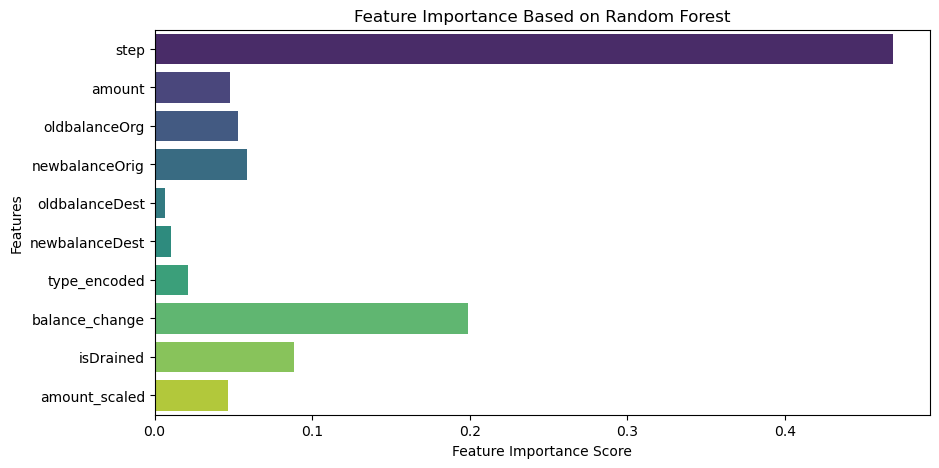

In [57]:
# Feature Importance Visualization
feature_importance = rf.feature_importances_  # Extract feature importance from Random Forest
features = X_train.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=features, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance Based on Random Forest")
plt.show()
